# 3.1 Seperate 2 Gaussians

In [1]:
%matplotlib inline
import math as math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Project data onto a lower dimension

In [2]:
# mean, covariance matrices
ma = np.array([2,2]) 
mb = np.array([5,7])
sa = np.array([[2,1],[1,2]])
sb = np.array([[2,1],[1,2]])
# data points
xa1, xa2 = np.random.multivariate_normal(ma, sa, 200).T
xb1, xb2 = np.random.multivariate_normal(mb, sb, 200).T

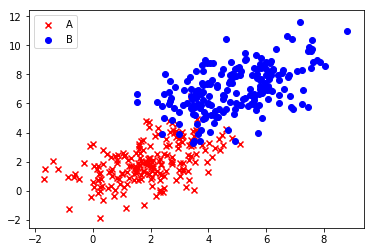

In [3]:
# plot
plt.scatter(xa1, xa2, marker='x', color='r', label='A')
plt.scatter(xb1, xb2, marker='o', color='b', label='B')
plt.legend()

- Choose w, calculate y

Text(0.5,1,'w=(-1,1)')

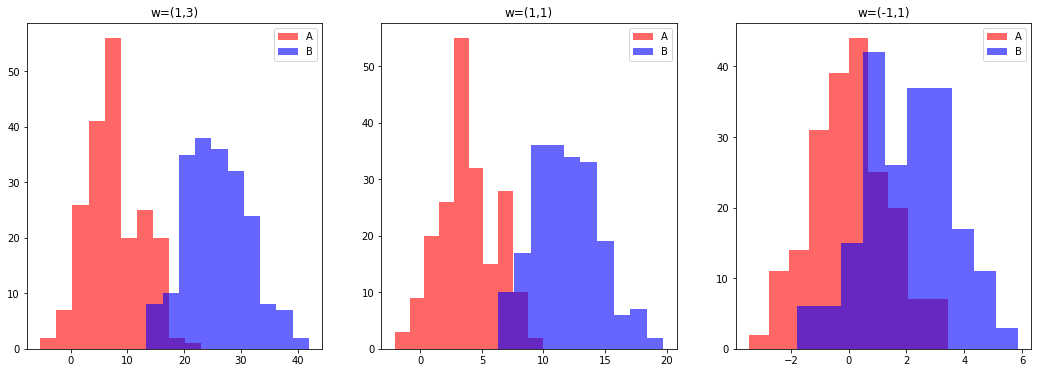

In [4]:
# choose 3 random w
w1 = np.array([1,3])
w2 = np.array([1,1])
w3 = np.array([-1,1])
xa = np.array([xa1,xa2])
xb = np.array([xb1,xb2])
ya1 = np.dot(w1,xa)
yb1 = np.dot(w1,xb)
ya2 = np.dot(w2,xa)
yb2 = np.dot(w2,xb)
ya3 = np.dot(w3,xa)
yb3 = np.dot(w3,xb)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
ax[0].hist(ya1, color='r', label='A', alpha=0.6)
ax[0].hist(yb1, color='b', label='B', alpha=0.6)
ax[0].legend()
ax[0].set_title("w=(1,3)")
ax[1].hist(ya2, color='r', label='A', alpha=0.6)
ax[1].hist(yb2, color='b', label='B', alpha=0.6)
ax[1].legend()
ax[1].set_title("w=(1,1)")
ax[2].hist(ya3, color="r", label='A', alpha=0.6)
ax[2].hist(yb3, color='b', label='B', alpha=0.6)
ax[2].legend()
ax[2].set_title("w=(-1,1)")

- define F(w)

In [5]:
def calcul_miu(y):
    n = len(y)
    miu = 1/n * np.sum(y)
    return miu

def calcul_sigmasqu(y,miu):
    sum_y = 0
    for y_elem in y:
        sum_y += (y_elem-miu)**2
    sigmasqu = 1/len(y) * sum_y
    return sigmasqu

def F(miu_a,miu_b,sigmasqu_a,sqgmasqu_b,na,nb):
    molecule = (miu_a - miu_b)**2
    denominator = na/(na+nb) * sigmasqu_a + nb/(na+nb) * sigmasqu_b
    return molecule/denominator

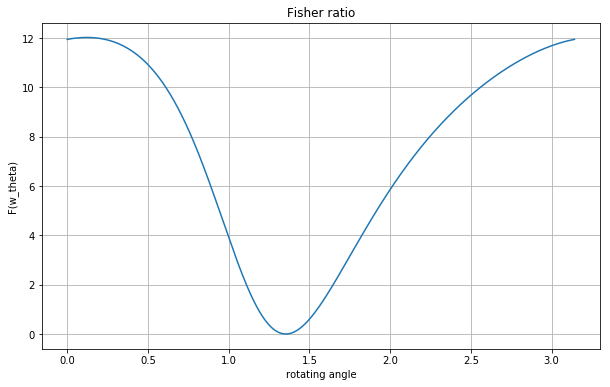

In [6]:
thetas = np.linspace(0,math.pi,1000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
Fw = []
for theta in thetas:
    R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    w_theta = R.dot(w1)
    y_a1_theta = np.dot(w_theta,xa)
    y_a2_theta = np.dot(w_theta,xb)
    miu_a = calcul_miu(y_a1_theta)
    miu_b = calcul_miu(y_a2_theta)
    sigmasqu_a = calcul_sigmasqu(y_a1_theta,miu_a)
    sigmasqu_b = calcul_sigmasqu(y_a2_theta,miu_b)
    Fw.append(F(miu_a,miu_b,sigmasqu_a,sigmasqu_b,200,200))
    
ax.plot(thetas,Fw)
ax.set_xlabel('rotating angle')
ax.set_ylabel('F(w_theta)')
ax.set_title('Fisher ratio')
plt.grid()

- solve the solution of F(w)

In [7]:
# use w1 to get the solution
thetas_sol = np.linspace(0,math.pi,1000)
Fw_sol = []
for theta in thetas_sol:
    R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    w_theta = R.dot(w1)
    y_a1_theta = np.dot(w_theta,xa)
    y_a2_theta = np.dot(w_theta,xb)
    miu_a = calcul_miu(y_a1_theta)
    miu_b = calcul_miu(y_a2_theta)
    sigmasqu_a = calcul_sigmasqu(y_a1_theta,miu_a)
    sigmasqu_b = calcul_sigmasqu(y_a2_theta,miu_b)
    Fw_sol.append(F(miu_a,miu_b,sigmasqu_a,sigmasqu_b,200,200))

index = Fw_sol.index(max(Fw_sol))
theta_star = thetas_sol[index]
print(theta_star)
R_star = np.array([[math.cos(theta_star), -math.sin(theta_star)],[math.sin(theta_star),math.cos(theta_star)]])
w_star = R_star.dot(w1)
print(w_star)

0.122644758248
[ 0.62547598  3.09980319]


## 2. Probability distribution, contour plots

### 2.(a)

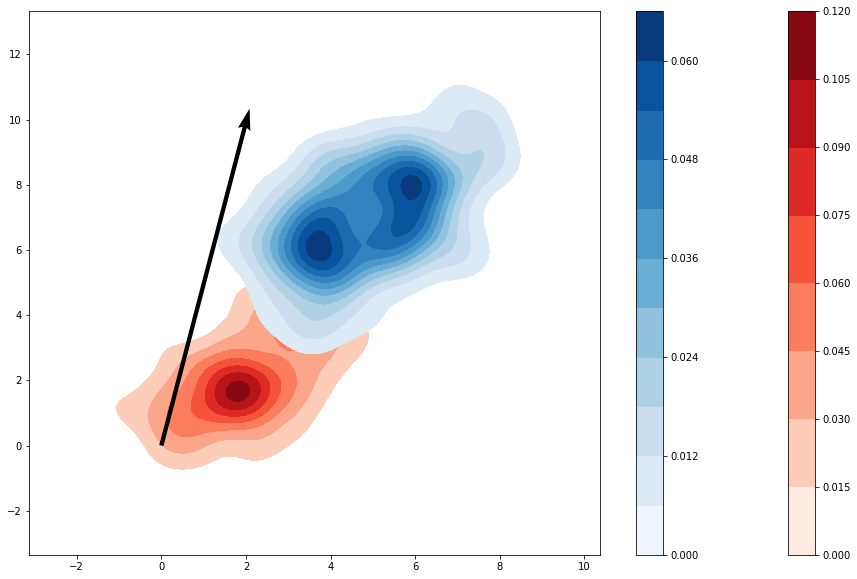

In [8]:
# define function of distribution
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10))
sns.kdeplot(xa1, xa2, cmap='Reds', shade=True, shade_lowest=False, cbar=True, ax=ax)
sns.kdeplot(xb1, xb2, cmap='Blues', shade=True, shade_lowest=False, cbar=True, ax=ax)
X=[0]
Y=[0]
U=w_star[0]
V=w_star[1]
ax.quiver(X,Y,U,V,angles='xy', scale_units='xy', scale=0.3)

### 2.(b)

In [10]:
# equal covariance
# define calcul
def prob(m,s,x):
    det_s = np.linalg.det(s)
    inv_s = np.linalg.inv(s)
    p = math.sqrt(det_s)/(2*math.pi) * math.exp(-1/2 * np.dot(np.dot((x-m), inv_s), (x-m).T))
    return p

def calcul_log(x):
    pa = prob(ma,sa,x)
    pb = prob(mb,sb,x)
    return math.log(pa/pb)

- Sa = Sb

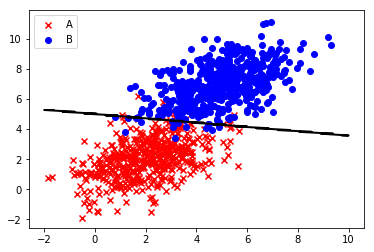

In [11]:
ma = np.array([2,2]) 
mb = np.array([5,7])
sa = np.array([[2,1],[1,2]])
sb = np.array([[2,1],[1,2]])
xa1, xa2 = np.random.multivariate_normal(ma, sa, 500).T
xb1, xb2 = np.random.multivariate_normal(mb, sb, 500).T
plt.scatter(xa1, xa2, marker='x', color='r', label='A')
plt.scatter(xb1, xb2, marker='o', color='b', label='B')
plt.legend()

#generate grid
x1_range = np.linspace(-2,10,100)
x2_range = np.linspace(-2,10,100)
X1, X2 = np.meshgrid(x1_range,x2_range)
Xa = []
for i in zip(X1.flat, X2.flat):
    Xa.append(np.array(i))


decision_boundary_x1 = []
decision_boundary_x2 = []
for xa in Xa:
    # print(calcul_log(xa))
    if (-0.1< calcul_log(xa)<0.1):
        decision_boundary_x1.append(xa[0])
        decision_boundary_x2.append(xa[1])
        
plt.plot(decision_boundary_x1,decision_boundary_x2,color='black', linewidth=2)

- Sa ≠ Sb

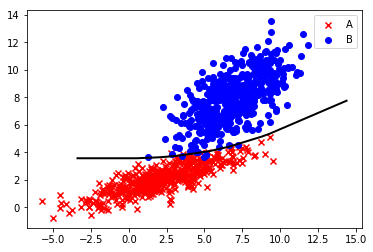

In [12]:
ma = np.array([2,2])
mb = np.array([7,8])
sa = np.array([[6,2],[2,1]])
sb = np.array([[3,2],[2,3]])
xa1, xa2 = np.random.multivariate_normal(ma, sa, 500).T
xb1, xb2 = np.random.multivariate_normal(mb, sb, 500).T
plt.scatter(xa1, xa2, marker='x', color='r', label='A')
plt.scatter(xb1, xb2, marker='o', color='b', label='B')
plt.legend()

#generate grid
x1_range = np.linspace(-5,15,200)
x2_range = np.linspace(2,15,200)
X1, X2 = np.meshgrid(x1_range,x2_range)
Xa = []
for i in zip(X1.flat, X2.flat):
    Xa.append(np.array(i))

decision_boundary_x1 = []
decision_boundary_x2 = []
for xa in Xa:
#     print(calcul_log(xa))
    if (-0.01< calcul_log(xa)<0.01):
        decision_boundary_x1.append(xa[0])
        decision_boundary_x2.append(xa[1])
        
plt.plot(decision_boundary_x1,decision_boundary_x2,color='black',linewidth=2)

### 2. (c)

In [13]:
def F_unbalanced_func(miu_a,miu_b,sigmasqu_a,sigmasqu_b):
    molecule = (miu_a - miu_b)**2
    denominator = sigmasqu_a + sigmasqu_b
    return molecule/denominator

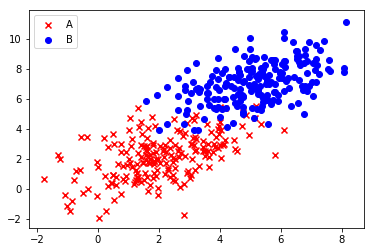

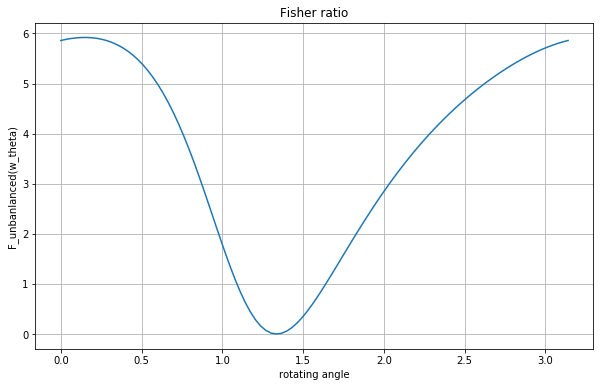

In [14]:
ma = np.array([2,2]) 
mb = np.array([5,7])
sa = np.array([[2,1],[1,2]])
sb = np.array([[2,1],[1,2]])

xa1, xa2 = np.random.multivariate_normal(ma, sa, 200).T
xb1, xb2 = np.random.multivariate_normal(mb, sb, 200).T
plt.scatter(xa1, xa2, marker='x', color='r', label='A')
plt.scatter(xb1, xb2, marker='o', color='b', label='B')
plt.legend()

w1 = np.array([1,3])
xa = np.array([xa1,xa2])
xb = np.array([xb1,xb2])

thetas = np.linspace(0,math.pi,100)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

F_unbanlanced = []
for theta in thetas:
    R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    w_theta = R.dot(w1)
    y_a1_theta = np.dot(w_theta,xa)
    y_a2_theta = np.dot(w_theta,xb)
    miu_a = calcul_miu(y_a1_theta)
    miu_b = calcul_miu(y_a2_theta)
    sigmasqu_a = calcul_sigmasqu(y_a1_theta,miu_a)
    sigmasqu_b = calcul_sigmasqu(y_a2_theta,miu_b)
    F_unbanlanced.append(F_unbalanced_func(miu_a,miu_b,sigmasqu_a,sigmasqu_b))
    
ax.plot(thetas,F_unbanlanced)
ax.set_xlabel('rotating angle')
ax.set_ylabel('F_unbanlanced(w_theta)')
ax.set_title('Fisher ratio')
plt.grid()

In [15]:
# use w1 to get the solution
thetas_sol = np.linspace(0,math.pi,1000)
Fw_sol = []
for theta in thetas_sol:
    R = np.array([[math.cos(theta), -math.sin(theta)],[math.sin(theta),math.cos(theta)]])
    w_theta = R.dot(w1)
    y_a1_theta = np.dot(w_theta,xa)
    y_a2_theta = np.dot(w_theta,xb)
    miu_a = calcul_miu(y_a1_theta)
    miu_b = calcul_miu(y_a2_theta)
    sigmasqu_a = calcul_sigmasqu(y_a1_theta,miu_a)
    sigmasqu_b = calcul_sigmasqu(y_a2_theta,miu_b)
    Fw_sol.append(F_unbalanced_func(miu_a,miu_b,sigmasqu_a,sigmasqu_b))
    
index = Fw_sol.index(max(Fw_sol))
theta_star = thetas_sol[index]
print(theta_star)
R_star = np.array([[math.cos(theta_star), -math.sin(theta_star)],[math.sin(theta_star),math.cos(theta_star)]])
w_star = R_star.dot(w1)
print(w_star)

0.147802657376
[ 0.54730174  3.11455628]
